# Autogradient Tutorial

This notebook documents the usage and application of the autogradient python file to perform various machine learning algorithms with ease.
* <b>Step 1 </b>: Import all class files from autogradient python script.
* <b>Step 2 </b>: Use the '<b>Tensor</b>' class file to intialize all variables.
* <b>Step 3 </b>: Use the math functions available in the '<b>op</b>' class file to perform necessary computations and obtain the final cost function.
* <b>Step 4 </b>: Use the '<b>graph</b>' class file to specify the function to be differentiated and wrt to what all variables.
* <b>Step 5 </b>: Obtain gradients by using '<b>get_grad()</b>' function belonging to graph class file.
* <b>Step 6 </b>: To recompute the cost function after updating or changing values of the variables use the function '<b>recompute_graph()</b>' of the graph class.

In [1]:
import numpy as np
from autogradient import *

## Creating dummy dataset

In [2]:
# Creating dummy data
import numpy as np
import matplotlib.pyplot as plt

n = 20 # Size of dataset
o = 2 # No of classes 
m = 2 # Feature vector size
np.random.seed(6)
X_val = np.random.rand(m,n)
y = np.round(np.random.rand(n)*(o-1)).astype(int) 
Y_val = np.zeros(shape = (o,X_val.shape[1]))
Y_val[y,range(n)] = 1
plt.scatter(X_val[0,:],X_val[1,:],c=y[0:],cmap=plt.cm.Spectral,edgecolors='k')
plt.show()


X = Tensor(X_val)
Y = Tensor(Y_val)


## 4 - Layer neural network Example

In [3]:
# 2 layer neural-net Example # 
np.random.seed(1)
h1 = 30 # Number of neurons in  hidden layers - 1
h2 = 30 # Number of neurons in  hidden layers - 2

# Intializing variables
W0 = Tensor(np.random.rand(h1,m)-0.5)
b0 = Tensor(np.random.rand(h1,1)-0.5)
W1 = Tensor(np.random.rand(h2,h1)-0.5)
b1 = Tensor(np.random.rand(h2,1)-0.5)
W2 = Tensor(np.random.rand(o,h2)-0.5)
b2 = Tensor(np.random.rand(o,1)-0.5)

# Constructing cost function
h1 = W0.dot(X) + b0
a1 = h1.RelU()
h2 = W1.dot(a1)+ b1
a2 = h2.RelU()
h3 = W2.dot(a2)+b2
a3 = h3.softmax_crossentropy_loss(Y,axis=0) # - Final cost function

# Pruning graphs to obtain gradients 
gr = graph(a3,[W0,W1,b0,b1])

alpha = 0.4
loss = []
# Training over 2500 epochs
for i in range(1500):
    w0_grad,w1_grad,b0_grad,b1_grad = gr.get_grad() #getting gradients
    W0.value-=w0_grad/n*alpha
    W1.value-=w1_grad/n*alpha
    b0_grad -=b0_grad/n*alpha
    b1_grad -=b1_grad/n*alpha
    #Recomputing the cost function
    gr.recompute_graph()
    # For plotting purposes.
    loss.append(a3.value[0])

    
print('Accuracy :' , 100 -np.sum(np.abs(np.round(h3.cache) - Y.value))/n*100,'%')#
#plotting loss as a function of epochs
plt.plot(loss)
plt.xlabel('No of epochs')
plt.ylabel('loss')
plt.show()


IndexError: invalid index to scalar variable.

## Deep neural network Example

In [ ]:
# L - layer neural-net Example # 
np.random.seed(5)

hid_lay = [m,20,20,20,o]# 3 hidden layers


# Intializing variables
X = Tensor(X_val)
Y = Tensor(Y_val)
W = []
b =[]
c = len(hid_lay)-1

for i in range(1,c+1):
    W.append(Tensor(np.random.rand(hid_lay[i],hid_lay[i-1])-0.5))
    b.append(Tensor(np.random.rand(hid_lay[i],1)-0.5))

# Constructing cost function
act=[X]
hid=[]

for i in range(c):
    hid.append(W[i].dot(act[i]) )
    if i==2:
        act.append(hid[i].RelU())
    else:
        act.append(hid[i].RelU())

cost = hid[c-1].softmax_crossentropy_loss(Y,axis=0) # - Final cost function


# concatinating weights
weights = W+b

# pruning comp graph
gr = graph(cost,weights)


# Training over 2000 epochs
alpha = 0.3
loss = []
for i in range(1000):
    weight_grad = gr.get_grad() #getting gradients
    # Updating weights
    for j in range(c):
        W[j].value-=weight_grad[j]/n*alpha
        b[j].value-=weight_grad[c+j]/n*alpha
    
    #for plotting  purposes.
    loss.append(cost.value[0])   
    
    #Recomputing the cost function
    gr.recompute_graph()

print('Accuracy :' , 100 -np.sum(np.abs(np.round(hid[c-1].cache) - Y.value))/n*100,'%')

#plotting loss as a function of epochs
plt.plot(loss)
plt.xlabel('No of epochs')
plt.ylabel('loss')
plt.show()


## Linear regression example

Error 1.1507961163874203 %


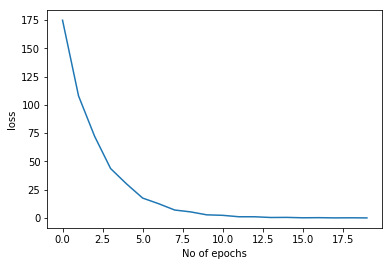

In [4]:
# Linear regression Example #

# Creating dummy dataset
np.random.seed(1)
x = Tensor(np.array(range(10)))
y = Tensor(x.value*3+np.random.rand(10)*1)

#Initializing variables
w = Tensor(0)

# Constructing cost function
cost = op.mse(x*w,y)

# constructing graph object
gr = graph(cost,[w])

# Training
loss = []
alpha = 0.2
for i in range(20):
    # getting gradients
    w_grad = gr.get_grad()
    w.value-=w_grad[0]*alpha
    # recomputing cost function
    gr.recompute_graph()
    loss.append(cost.value[0])

print('Error',(w.value-3)/3*100,'%')

#plotting loss as a function of epochs
plt.plot(loss)
plt.xlabel('No of epochs')
plt.ylabel('loss')
plt.show()